# Loading Library 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading the data

In [2]:
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe([0]).T

,count,mean,std,min,0%,50%,max
year,8128.0,2013.804011,4.044249,1983.0,1983.0,2015.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,29999.0,450000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,1.0,60000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,2.0,5.0,14.0


In [6]:
# Closer look at data types
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

# Data Cleaning 

In [7]:
# Checking missing values per column
df.isnull().sum().sort_values(ascending = False )

torque           222
mileage          221
engine           221
seats            221
max_power        215
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

In [8]:
# Percentage of missing values per column according to whole of data 
round(df.isnull().mean() * 100)

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          3.0
engine           3.0
max_power        3.0
torque           3.0
seats            3.0
dtype: float64

In [9]:
# Total amount of missing values as a whole 
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells)

0.010410357359176257

In [10]:
# Duplicated values sum
df.duplicated().sum()

1202

In [11]:
# Dropping duplicated values 
df.drop_duplicates(inplace=True)

In [12]:
# Filling missing values with backward value 
df.fillna(method= 'bfill', inplace=True)

In [13]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### Cleaning all alphanumeric columns 

In [14]:
df['seats'] = df['seats'].astype(np.int64)

In [15]:
df['engine'] = df['engine'].str.replace(r'CC', '')
df['engine'] = df['engine'].astype(np.int64)

In [16]:
df['max_power'] = df['max_power'].str.replace(r'bhp', '') 
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce') 
df.fillna(method= 'bfill', inplace=True)
df['max_power'] = df['max_power'].astype(np.int64)

In [17]:
df['mileage'] = df['mileage'].str.replace(r'[^\d\.]', '')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce') 
df['mileage'] = df['mileage'].astype(np.int64)

<ipython-input-17-d30806e02956>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['mileage'] = df['mileage'].str.replace(r'[^\d\.]', '')


In [18]:
df['torque'] = df['torque'].str.replace(r'[\D.]', '')
df['torque'] = df['torque'].str[:3]
df['torque'] = pd.to_numeric(df['torque'], errors='coerce') 
df['torque'] = df['torque'].astype(np.int64)

<ipython-input-18-b6553c0474c9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['torque'] = df['torque'].str.replace(r'[\D.]', '')


In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,190,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,250,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,127,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,224,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,115,5


In [20]:
# Removing 'name' column
df.drop(['name'], axis=1, inplace=True)

In [21]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74,190,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,250,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,127,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,224,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,115,5


# Exploratory Data Analysis

<AxesSubplot:xlabel='fuel', ylabel='seats'>

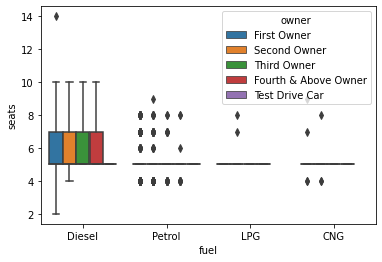

In [22]:
# There's a 14 seat Diesel car, perhaps a transportation vehicle?
sns.boxplot(x='fuel', y="seats", hue="owner", data=df)

<AxesSubplot:xlabel='transmission', ylabel='seats'>

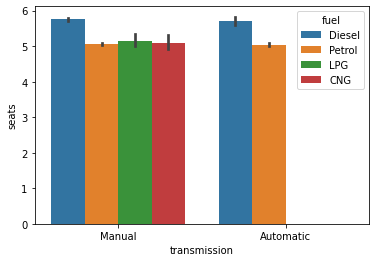

In [23]:
# More fuel options for Manuel transmission cars
sns.barplot(x='transmission', y='seats', hue='fuel', data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

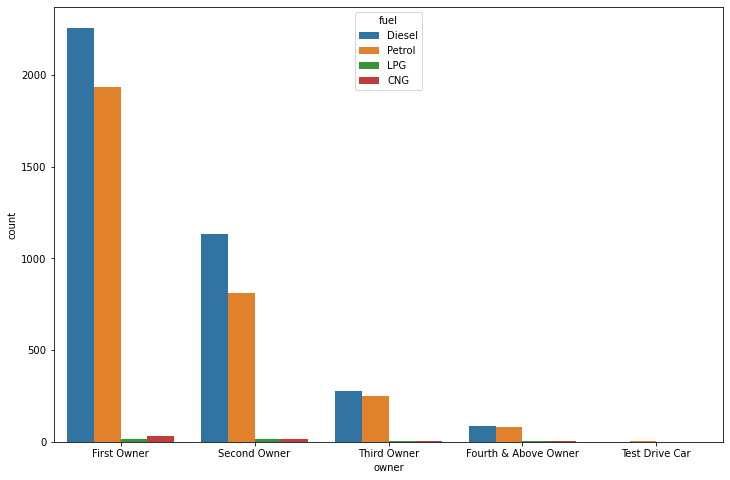

In [24]:
# Seems cars dont sell as well after having a second owner 
plt.figure(figsize = (12,8))
sns.countplot(x='owner', hue='fuel', data=df)

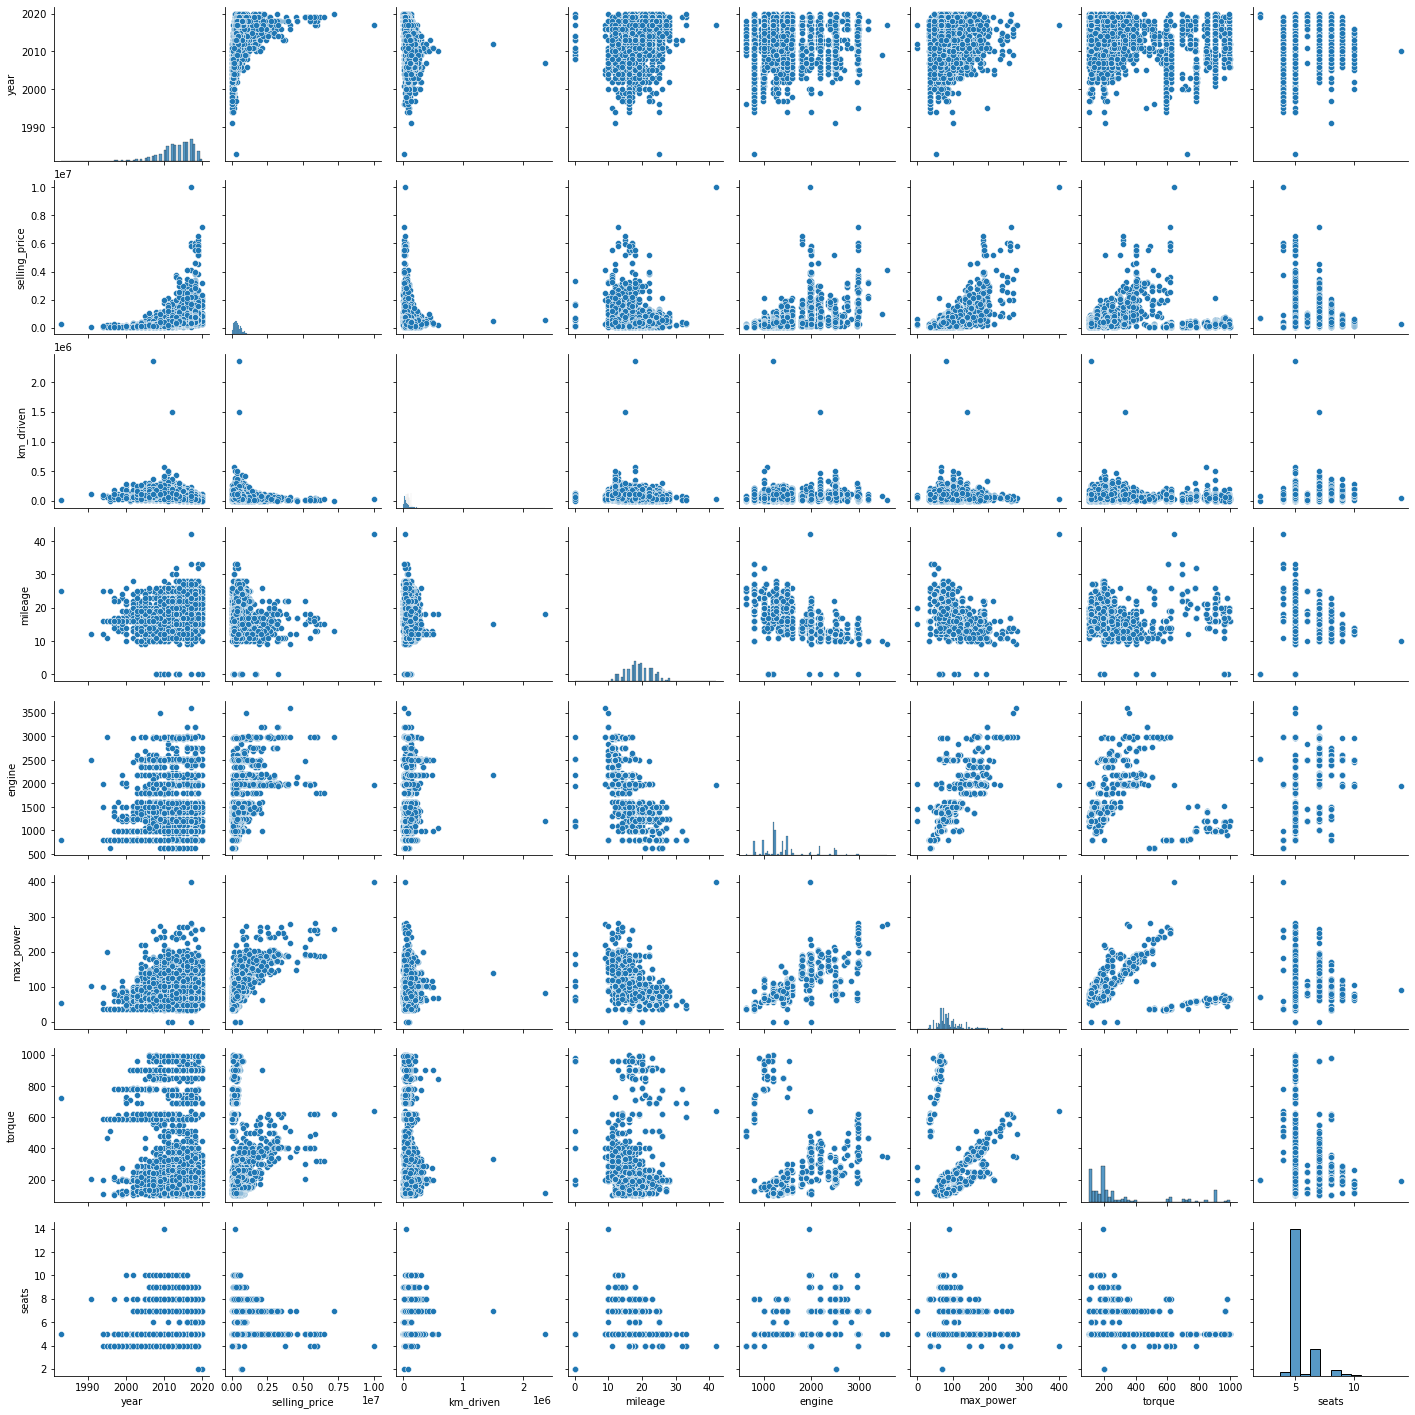

In [25]:
# Linear relationship betwen max_power & engine, max_power & torque, selling_price & max_power
sns.pairplot(df)

<AxesSubplot:>

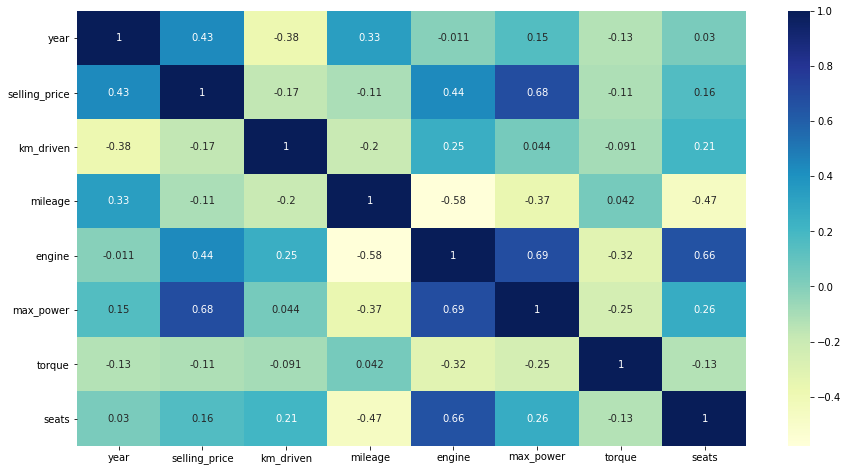

In [26]:
# Looking for correlation between independent & dependent variable, as well multicollinearity
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [27]:
# Dropping due to multicollinearity
df.drop(['km_driven', 'mileage', 'torque'], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           6926 non-null   int64 
 1   selling_price  6926 non-null   int64 
 2   fuel           6926 non-null   object
 3   seller_type    6926 non-null   object
 4   transmission   6926 non-null   object
 5   owner          6926 non-null   object
 6   engine         6926 non-null   int64 
 7   max_power      6926 non-null   int64 
 8   seats          6926 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 799.1+ KB


<AxesSubplot:xlabel='selling_price'>

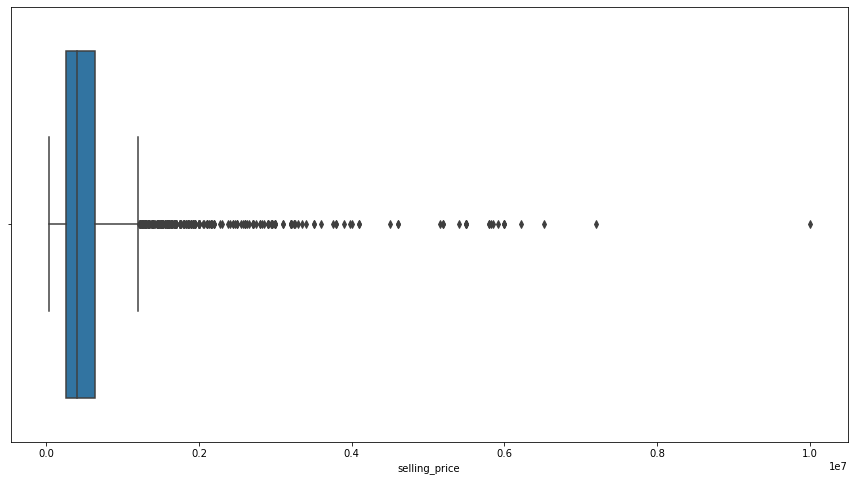

In [29]:
# Quick inspection for outliers
plt.figure(figsize = (15,8))
sns.boxplot(x= 'selling_price', data = df)

In [30]:
min(df['selling_price'])

29999

In [31]:
max(df['selling_price'])

10000000

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           6926 non-null   int64 
 1   selling_price  6926 non-null   int64 
 2   fuel           6926 non-null   object
 3   seller_type    6926 non-null   object
 4   transmission   6926 non-null   object
 5   owner          6926 non-null   object
 6   engine         6926 non-null   int64 
 7   max_power      6926 non-null   int64 
 8   seats          6926 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 799.1+ KB


In [33]:
# Dropping outliers through IQR & fences 
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['selling_price'] >= Q1 - 1.5 * IQR) & (df['selling_price'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

In [34]:
df.head()

,year,selling_price,fuel,seller_type,transmission,owner,engine,max_power,seats
0,2014,450000,Diesel,Individual,Manual,First Owner,1248,74,5
1,2014,370000,Diesel,Individual,Manual,Second Owner,1498,103,5
2,2006,158000,Petrol,Individual,Manual,Third Owner,1497,78,5
3,2010,225000,Diesel,Individual,Manual,First Owner,1396,90,5
4,2007,130000,Petrol,Individual,Manual,First Owner,1298,88,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 0 to 8125
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           6598 non-null   int64 
 1   selling_price  6598 non-null   int64 
 2   fuel           6598 non-null   object
 3   seller_type    6598 non-null   object
 4   transmission   6598 non-null   object
 5   owner          6598 non-null   object
 6   engine         6598 non-null   int64 
 7   max_power      6598 non-null   int64 
 8   seats          6598 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 515.5+ KB


In [36]:
df.isnull().sum()

year             0
selling_price    0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
max_power        0
seats            0
dtype: int64

In [37]:
min(df['selling_price'])

29999

In [38]:
max(df['selling_price'])

1200000

<AxesSubplot:xlabel='selling_price'>

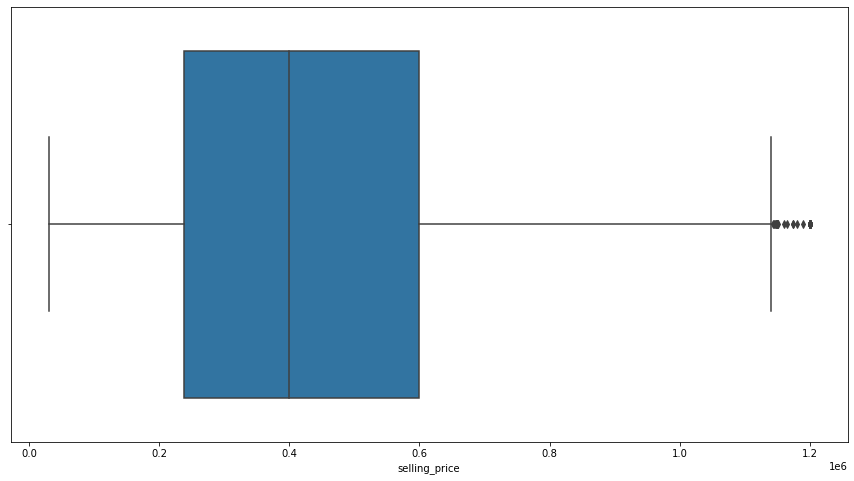

In [39]:
plt.figure(figsize = (15,8))
sns.boxplot(x= 'selling_price', data = df)

# Data Preprocessing / One-Hot Encoding

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder()

In [42]:
ohe.fit_transform(df[['transmission', 'fuel', 'seller_type', 'owner']]).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [43]:
feature_arry = ohe.fit_transform(df[['transmission','fuel', 'seller_type', 'owner']]).toarray()

In [44]:
ohe.categories_

[array(['Automatic', 'Manual'], dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Third Owner'], dtype=object)]

In [45]:
feature_labels = ohe.categories_

In [46]:
np.hstack(feature_labels).ravel()

array(['Automatic', 'Manual', 'CNG', 'Diesel', 'LPG', 'Petrol', 'Dealer',
       'Individual', 'Trustmark Dealer', 'First Owner',
       'Fourth & Above Owner', 'Second Owner', 'Third Owner'],
      dtype=object)

In [47]:
feature_labels = np.hstack(feature_labels).ravel()

In [48]:
print(feature_labels)

['Automatic' 'Manual' 'CNG' 'Diesel' 'LPG' 'Petrol' 'Dealer' 'Individual'
 'Trustmark Dealer' 'First Owner' 'Fourth & Above Owner' 'Second Owner'
 'Third Owner']


In [49]:
pd.DataFrame(feature_arry, columns = feature_labels)

,Automatic,Manual,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Fourth & Above Owner,Second Owner,Third Owner
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6594,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6595,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6596,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [50]:
features = pd.DataFrame(feature_arry, columns = feature_labels)

In [51]:
df.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)

In [52]:
pd.concat([df, features], axis = 1)

,year,selling_price,fuel,seller_type,transmission,owner,engine,max_power,seats,Automatic,...,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Fourth & Above Owner,Second Owner,Third Owner
0,2014,450000,Diesel,Individual,Manual,First Owner,1248,74,5,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2014,370000,Diesel,Individual,Manual,Second Owner,1498,103,5,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2006,158000,Petrol,Individual,Manual,Third Owner,1497,78,5,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2010,225000,Diesel,Individual,Manual,First Owner,1396,90,5,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2007,130000,Petrol,Individual,Manual,First Owner,1298,88,5,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,2013,260000,Petrol,Individual,Manual,Second Owner,998,67,5,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6594,2014,475000,Diesel,Individual,Manual,Second Owner,1396,88,5,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6595,2013,320000,Petrol,Individual,Manual,First Owner,1197,82,5,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6596,2007,135000,Diesel,Individual,Manual,Fourth & Above Owner,1493,110,5,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [53]:
df_new = pd.concat([df, features], axis = 1)

In [54]:
df_new.drop(['transmission', 'owner', 'fuel', 'seller_type', ], axis=1, inplace=True)

In [55]:
df_new.head()

,year,selling_price,engine,max_power,seats,Automatic,Manual,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Fourth & Above Owner,Second Owner,Third Owner
0,2014,450000,1248,74,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2014,370000,1498,103,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2006,158000,1497,78,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2010,225000,1396,90,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2007,130000,1298,88,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Spitting Data

In [56]:
X = df_new.drop(['selling_price'],axis=1)
y = df_new['selling_price']

# Scaling the Data

In [57]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# RandomForest Regressor

In [58]:
rfr_pipeline = Pipeline(steps=[('norm', MinMaxScaler()), ('rfr', RandomForestRegressor())])

In [59]:
scoring = {'R2': 'r2',
           'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error',
           'RMSE': 'neg_root_mean_squared_error'}

In [60]:
scores = cross_validate(rfr_pipeline, X, y, scoring=scoring,
                        cv=10, return_train_score=True)

In [61]:
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_R2', 'train_R2', 'test_MAE', 'train_MAE', 'test_MSE', 'train_MSE', 'test_RMSE', 'train_RMSE'])


In [62]:
print('R2 score: ', scores['train_R2'].mean())
print('Mean Absolute Error: ', scores['train_MAE'].mean())
print('Mean Squared Error: ', scores['train_MSE'].mean())
print('Root Mean Squared Error: ', scores['train_RMSE'].mean())

R2 score:  0.9350307027861844
Mean Absolute Error:  -44290.819715926234
Mean Squared Error:  -4061378659.036618
Root Mean Squared Error:  -63728.1723633674


In [63]:
print('R2 score: ', scores['test_R2'].mean())
print('Mean Absolute Error: ', scores['test_MAE'].mean())
print('Mean Squared Error: ', scores['test_MSE'].mean())
print('Root Mean Squared Error: ', scores['test_RMSE'].mean())

R2 score:  0.8524224954873981
Mean Absolute Error:  -67586.76753001106
Mean Squared Error:  -9161421283.084072
Root Mean Squared Error:  -95564.47917387405


# Linear Regression

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
lin_pipeline = Pipeline(steps=[('norm', MinMaxScaler()),
                ('lr', LinearRegression())])

In [66]:
lin_pipeline.fit(X_train,y_train)

Pipeline(steps=[('norm', MinMaxScaler()), ('lr', LinearRegression())])

In [67]:
print(lin_pipeline.named_steps['lr'].intercept_)

-916585.6662527274


In [68]:
coeffecients = pd.DataFrame(lin_pipeline.named_steps['lr'].coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
year,1.259144e+06
engine,9.964671e+04
max_power,9.595704e+05
seats,1.622958e+05
Automatic,3.692153e+04
Manual,-3.692153e+04
CNG,-5.008169e+04
Diesel,5.871274e+04
LPG,1.445240e+04
Petrol,-2.308345e+04


In [69]:
predictions = lin_pipeline.predict(X_test)

In [70]:
lr_pipeline = Pipeline(steps=[('norm', MinMaxScaler()), ('lr', LinearRegression())])

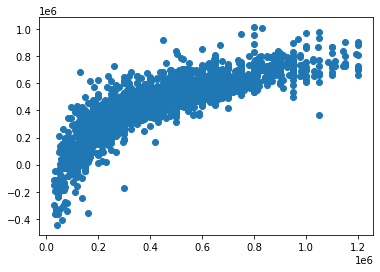

In [71]:
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

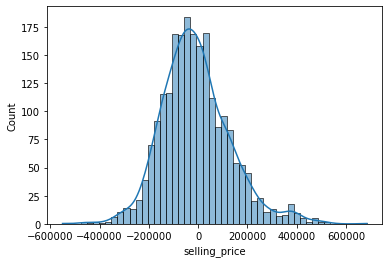

In [72]:
sns.histplot((y_test-predictions),kde=True, bins=50)

In [73]:
scoring = {'R2': 'r2',
           'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error',
           'RMSE': 'neg_root_mean_squared_error'}

In [74]:
scores = cross_validate(lin_pipeline, X, y, scoring=scoring,
                         cv=10, return_train_score=True)

In [75]:
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_R2', 'train_R2', 'test_MAE', 'train_MAE', 'test_MSE', 'train_MSE', 'test_RMSE', 'train_RMSE'])


In [76]:
print('R2 score: ', scores['train_R2'].mean())
print('Mean Absolute Error: ', scores['train_MAE'].mean())
print('Mean Squared Error: ', scores['train_MSE'].mean())
print('Root Mean Squared Error: ', scores['train_RMSE'].mean())

R2 score:  0.6881241325769965
Mean Absolute Error:  -106739.78653431633
Mean Squared Error:  -19496764512.01861
Root Mean Squared Error:  -139629.66973539809


In [77]:
print('R2 score: ', scores['test_R2'].mean())
print('Mean Absolute Error: ', scores['test_MAE'].mean())
print('Mean Squared Error: ', scores['test_MSE'].mean())
print('Root Mean Squared Error: ', scores['test_RMSE'].mean())

R2 score:  0.6837298175229239
Mean Absolute Error:  -107149.29217087533
Mean Squared Error:  -19651668267.963493
Root Mean Squared Error:  -140087.15172307077


# AdaBoost Regressor

In [78]:
ada_pipeline = Pipeline([('norm', MinMaxScaler()), ('ada', AdaBoostRegressor())])

In [79]:
scoring = {'R2': 'r2',
           'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error',
           'RMSE': 'neg_root_mean_squared_error'}

In [80]:
scores = cross_validate(ada_pipeline, X, y, scoring=scoring,
                         cv=10, return_train_score=True)

In [81]:
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_R2', 'train_R2', 'test_MAE', 'train_MAE', 'test_MSE', 'train_MSE', 'test_RMSE', 'train_RMSE'])


In [82]:
print('R2 score: ', scores['train_R2'].mean())
print('Mean Absolute Error: ', scores['train_MAE'].mean())
print('Mean Squared Error: ', scores['train_MSE'].mean())
print('Root Mean Squared Error: ', scores['train_RMSE'].mean())

R2 score:  0.7401864365212912
Mean Absolute Error:  -101037.17085227059
Mean Squared Error:  -16242278877.645718
Root Mean Squared Error:  -127418.99231873231


In [83]:
print('R2 score: ', scores['test_R2'].mean())
print('Mean Absolute Error: ', scores['test_MAE'].mean())
print('Mean Squared Error: ', scores['test_MSE'].mean())
print('Root Mean Squared Error: ', scores['test_RMSE'].mean())

R2 score:  0.7336567583065406
Mean Absolute Error:  -101092.82625177094
Mean Squared Error:  -16535251836.301352
Root Mean Squared Error:  -128510.08094987832


# Conclusion

1) RandomForestRegressor had best MAE when compared to the other models (Using MAE as main loss function as this dataset contained many outliers)

2) LinearRegression had the lowest R2 score, while its MAE wasnt far from AdaBoost MAE 